# Exploratory Data Analysis (EDA)

Dataset: Eye Disease Image Dataset - Mendeley (Kaggle)

*https://www.kaggle.com/datasets/abhinav099802/eye-disease-image-dataset/*

Goal:
- Understand class distributions
- Visually inspect eye images
- Ensure correct labeling
- Check for image size and channels
- Identify any data issues before modeling

### Data Paths

In [19]:
from pathlib import Path
import os
from PIL import Image
import matplotlib.pyplot as plt

PROJECT_ROOT = Path("..").resolve()
DATA_DIR = PROJECT_ROOT / "data" / "raw"

print("Project root: ", PROJECT_ROOT)
print("Data directory: ", DATA_DIR)

print()

print("Contents of data/raw: ")
for folder in DATA_DIR.iterdir():
    print(" -", folder.name)
    
print()

DATA_ORIGINAL_ROOT = DATA_DIR / "Original_Dataset"

if not DATA_ORIGINAL_ROOT.exists():
    raise FileNotFoundError(f"{DATA_ORIGINAL_ROOT} does not exist.")
    
print("Original Dataset: ", DATA_ORIGINAL_ROOT)

for cls in DATA_ORIGINAL_ROOT.iterdir():
    print(" -", cls.name)

Project root:  C:\Users\thecr\OneDrive\Desktop\portfolio\ocular-pathology-classification
Data directory:  C:\Users\thecr\OneDrive\Desktop\portfolio\ocular-pathology-classification\data\raw

Contents of data/raw: 
 - .gitkeep
 - Augmented_Dataset
 - Original_Dataset

Original Dataset:  C:\Users\thecr\OneDrive\Desktop\portfolio\ocular-pathology-classification\data\raw\Original_Dataset
 - Central Serous Chorioretinopathy
 - Diabetic Retinopathy
 - Disc Edema
 - Glaucoma
 - Healthy
 - Macular Scar
 - Myopia
 - Pterygium
 - Retinal Detachment
 - Retinitis Pigmentosa


### Class Distribution

In [28]:
def count_images(root):
    counts = {}
    for cls in (os.listdir(root)):
        cls_path = root / cls
        if not cls_path.is_dir():
            continue
        counts[cls] = len([_ for img in os.listdir(cls_path) if img.lower().endswith((".jpg", ".jpeg", ".png"))])
    return counts

cls_counts = count_images(DATA_ORIGINAL_ROOT)
cls_counts

{'Central Serous Chorioretinopathy': 101,
 'Diabetic Retinopathy': 1509,
 'Disc Edema': 127,
 'Glaucoma': 1349,
 'Healthy': 1024,
 'Macular Scar': 444,
 'Myopia': 500,
 'Pterygium': 17,
 'Retinal Detachment': 125,
 'Retinitis Pigmentosa': 139}

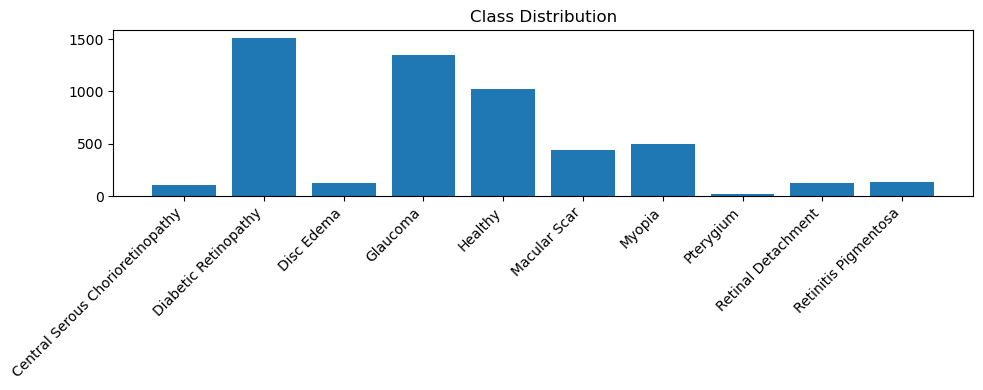

In [35]:
plt.figure(figsize=(10, 4))
plt.bar(cls_counts.keys(), cls_counts.values())
plt.xticks(rotation=45, ha="right")
plt.title("Class Distribution")
plt.tight_layout()
plt.show()

### Observation
- Dataset shows severe class imbalance.
- Diabetic Retinopathy and Glaucoma dominate the dataset.
- Several classes have less than 200 samples.
- Pushes towards the use of macro-F1 and class-weighted loss.